In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics 
import seaborn as sns
from numpy.random import randn
from statistics import mode
%matplotlib inline

# Parsing the JSON to dictionary

In [2]:
pupils = json.load(open('pupils.json', 'r'))    # result will be a python dictionary

#jeder entry ist ein schüler: zB data[0]
len(pupils)
#2715

1454

In [3]:
print(pupils[0].keys())#['_id', 'classId', 'userId', 'companyId', 'partner', 'lang', 'username', 'shownTaskSeries', 'currentTaskSeries', 'solvedTaskSeries', 'revisions', 'workspaceContent', 'chat', 'assists', 'experience', 'lastNotificationUpdate']
#[0]["currentSections"][0]["currentSubSections"][1]["exercise"]
print(pupils[0]["chat"]) #'sectionIdx', 'subSectionIdx', 'stage', 'wentActive', 'lastActive', 'created'

dict_keys(['_id', 'classId', 'userId', 'companyId', 'lang', 'username', 'currentTaskSeries', 'solvedTaskSeries', 'revisions', 'workspaceContent', 'chat', 'assists', 'experience', 'lastNotificationUpdate'])
{'messages': [], 'readUpTo': {}}


* _id
* classId
* userId
* companyId
* partner
* lang
* username
* shownTaskSeries
* currentTaskSeries
* solvedTaskSeries
    * [] liste mit allen solvedTaskSeries
       * taskSeriesId
       * currentSections
          * [] Liste mit allen Sections
             * currentSubSections
                * []
                   * duration (in sekunden)
                   * exercise
                      * state:
                         * text bei freitext in p tags
                         * 0, 1, 0... bei survey
                         * false, true, false bei MC
                      * submitted: true
                      * history: wahrscheinlich alte versionen bei freetext
                      * subType “freetext”, “survey”, “multipleChoice”
                      * falseAttempts bei MC: bool array mit erster lösung
                      * evaluation: (bool) bei freetext und MC
                         * “false” bei mc wenn falsche lösung und keine tipps → direkt musterlösung
                         * “correct” bei mc wenn richtige lösung
                         * “pending” bei freitext, wenn lehrer noch nicht bewertet
                      * rating: bei freetext
      * sectionIdx
      * subSectionIdx
      * stage
      * wentActive
      * lastActive
      * created
* revisions
   * _id
   * taskSeriesId
   * sectionIdx
   * subSectionIdx
   * begin
   * accepted
* workspaceContent
   * type: 'revision'
   * 'id': 'For-1_0_1'
* chat
   * messages
      * [] liste mit allen messages
         * date
         * sentBy: zB "auto"
         * message: string mit message
   * readUpTo
* assists
* experience
* lastNotificationUpdate

# EDA

## Alle tasks für einen Schüler checken

[56, 10, 56, 10, 30, 6, 8, 2, 21, 24, 7, 9, 22, 3, 5, 2, 18, 6, 4, 2]
Minimal time: 2
Maximal time: 56
Average time in sec: 15.05


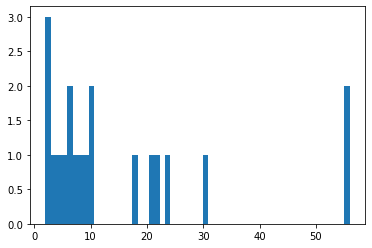

In [4]:
#["solvedTaskSeries"]#["currentSections"]#["currentSubSections"]
len(pupils[0]["solvedTaskSeries"]) #24 tasks gelöst
pupils[0]["solvedTaskSeries"]

durations = []

for task in range(len(pupils[0]["solvedTaskSeries"])): #alle tasks für einen schüler
    #print("task " + str(task))
    #print(data[0]["solvedTaskSeries"][task])
    for section in pupils[0]["solvedTaskSeries"][task]["currentSections"]: #für diese tasks, alle sections
        #print("section ")
        #print(type(section)) --> dict
        #print(section["currentSubSections"][0])
        for subsection in pupils[0]["solvedTaskSeries"][task]["currentSections"][0]["currentSubSections"]:
            #print("subsection")
            #print(subsection["duration"])
            durations.append(subsection["duration"])

            
#durations:
print(durations)
print("Minimal time: " + str(min(durations)))
print("Maximal time: " + str(max(durations)))
print("Average time in sec: " + str(sum(durations)/len(durations)))       
plt.hist(durations, bins=max(durations))
plt.show()

## Durations nach Aufgabentyp

In [5]:
tasktypes = ["blockly", "multipleChoice", "freetext", "survey", "inputField", "surveySlider", "noTask"]

durations = { tasktype: {"summe": 0, "count": 0, "avrg": 0} for tasktype in tasktypes}

missing_tasktype = []

#for pupilnumber in range(len(pupils[0:5])): #für die ersten 5 schüler
for pupilnumber in range(len(pupils)): #für jeden schüler
    for tasknumber in range(len(pupils[pupilnumber]["solvedTaskSeries"])): #für jede seiner tasks
        #print(pupilnumber, tasknumber)  --> macht er nur für einen? oder haben die anderen einfach keine?
        for sectionnumber in range(len(pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"])): #für diese tasks, alle sections
            for subsectionnumber in range(len(pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"])):
                if("exercise" in pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"][subsectionnumber].keys()): #nicht alle aufgaben haben eine exercise
                    if pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"][subsectionnumber]["exercise"]["subType"] == "blockly":
                        durations["blockly"]["summe"] += pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"][subsectionnumber]["duration"]
                        durations["blockly"]["count"] += 1
                    elif pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"][subsectionnumber]["exercise"]["subType"] == "multipleChoice":
                        durations["multipleChoice"]["summe"] += pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"][subsectionnumber]["duration"]
                        durations["multipleChoice"]["count"] += 1
                    elif pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"][subsectionnumber]["exercise"]["subType"] == "freetext":
                        durations["freetext"]["summe"] += pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"][subsectionnumber]["duration"]
                        durations["freetext"]["count"] += 1
                    elif pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"][subsectionnumber]["exercise"]["subType"] == "survey":
                        durations["survey"]["summe"] += pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"][subsectionnumber]["duration"]
                        durations["survey"]["count"] += 1
                    elif pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"][subsectionnumber]["exercise"]["subType"] == "inputField":
                        durations["inputField"]["summe"] += pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"][subsectionnumber]["duration"]
                        durations["inputField"]["count"] += 1
                    elif pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"][subsectionnumber]["exercise"]["subType"] == "surveySlider":
                        durations["surveySlider"]["summe"] += pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"][subsectionnumber]["duration"]
                        durations["surveySlider"]["count"] += 1
                    else:
                        if pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"][subsectionnumber]["exercise"]["subType"] not in missing_tasktype:
                            missing_tasktype.append(pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"][subsectionnumber]["exercise"]["subType"])

                else:
                    durations["noTask"]["summe"] += pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"][subsectionnumber]["duration"]
                    durations["noTask"]["count"] += 1
                    #print(pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"][subsectionnumber]["duration"])
#print(missing_tasktype)

for tasktype in durations:
    durations[tasktype]["avrg"] = durations[tasktype]["summe"]/durations[tasktype]["count"]
    
#print(durations)

#avrg_durations = [durations[tasktype]["avrg"] for tasktype in durations]
avrg_durations = {tasktype: durations[tasktype]["avrg"] for tasktype in durations}
print(avrg_durations)

{'blockly': 204.0857908847185, 'multipleChoice': 83.57389465401072, 'freetext': 236.7161560264543, 'survey': 46.27818302387268, 'inputField': 35.50204081632653, 'surveySlider': 16.908903544929927, 'noTask': 9.621214235868807}


([<matplotlib.axis.XTick at 0x7fc0c2976210>,
 [Text(0, 0, 'blockly'),
  Text(1, 0, 'multipleChoice'),
  Text(2, 0, 'freetext'),
  Text(3, 0, 'survey'),
  Text(4, 0, 'inputField'),
  Text(5, 0, 'surveySlider'),
  Text(6, 0, 'noTask')])

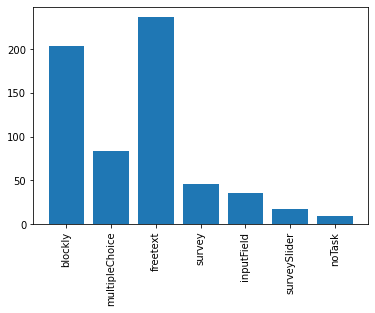

In [6]:
plt.bar(range(len(avrg_durations)), list(avrg_durations.values()), align='center')
plt.xticks(range(len(avrg_durations)), list(avrg_durations.keys()), rotation=90)

## Nur für das KI Paket

### Wie viele Klassen haben es gemacht? Wie viele SuS?

In [7]:
# taskseriesIDs vom KI Paket:
KI_taskseries_ids = ["AI-1-v2", "AI-2-v2", "AI-3-v2", "AI-4-v2", "ML-1", "ML-2", "ML-3", "Classification-1", "Clustering-1", "Classification-2", "Clustering-2", "LimitsML", "EvalML", "Impact-1", "Impact-2", "Impact-3", "Impact-4", "AIClosing"]

classIDsKI = []
pupilsKI = []

for pupilnumber in range(len(pupils)): #für jeden schüler
    for tasknumber in range(len(pupils[pupilnumber]["solvedTaskSeries"])): #für jede seiner tasks
        if(pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["taskSeriesId"] in KI_taskseries_ids):
            for sectionnumber in range(len(pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"])): #für diese tasks, alle sections
                for subsectionnumber in range(len(pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"])):
                    if("exercise" in pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"][subsectionnumber].keys()):
                        if pupils[pupilnumber]["classId"] not in classIDsKI:
                            classIDsKI.append(pupils[pupilnumber]["classId"])
                        if pupils[pupilnumber] not in pupilsKI:
                            pupilsKI.append(pupils[pupilnumber])

#print(classIDsKI) #--> ['uxfuiLT4xZA6yvE6L', 'qFEyvypMn4sAwLwtc', 'y7j9eKDPsqNkAycuy', '6Z2MmkKQKebb7nz8P', '4fyXxCKaLbCBaPbYE']
#print(len(pupils), len(pupilsKI)) --> 31 in pupilsKI

KI_classes = {classID: {"count": 0} for classID in classIDsKI}

for pupil in pupilsKI:
    KI_classes[pupil["classId"]]["count"] += 1

print(KI_classes)
print("")

# Jetzt nur die Klassen mit genügend SuS auswählen
final_pupils_KI = []
min_class_size = 10

# TODO: Klasse qFEyvypMn4sAwLwtc hatte einen fehler bei der aufgabe mit isa. da true false inverten!

for pupil in pupilsKI:
    if(KI_classes[pupil["classId"]]["count"] >= min_class_size):
        final_pupils_KI.append(pupil)

print("Zur Zeit gibt es " + str(len(final_pupils_KI)) + " sus, die das KI Paket bearbeitet haben")

KeyError: 'taskSeriesId'

### Wie viele Aufgaben haben die SuS jeweils gemacht?

NR tasks per pupil: [18, 18, 3, 11, 18, 10, 10, 18, 15, 11, 13, 15, 4, 2, 6, 6, 12, 11, 18, 18, 18, 3, 5, 9, 9, 1]
Completion rates: [100, 100, 16, 61, 100, 55, 55, 100, 83, 61, 72, 83, 22, 11, 33, 33, 66, 61, 100, 100, 100, 16, 27, 50, 50, 5]


Number SuS in each quartile: [5, 5, 7, 9]
Percent of students that have completed these quarts: [19.23, 19.23, 26.92, 34.62]


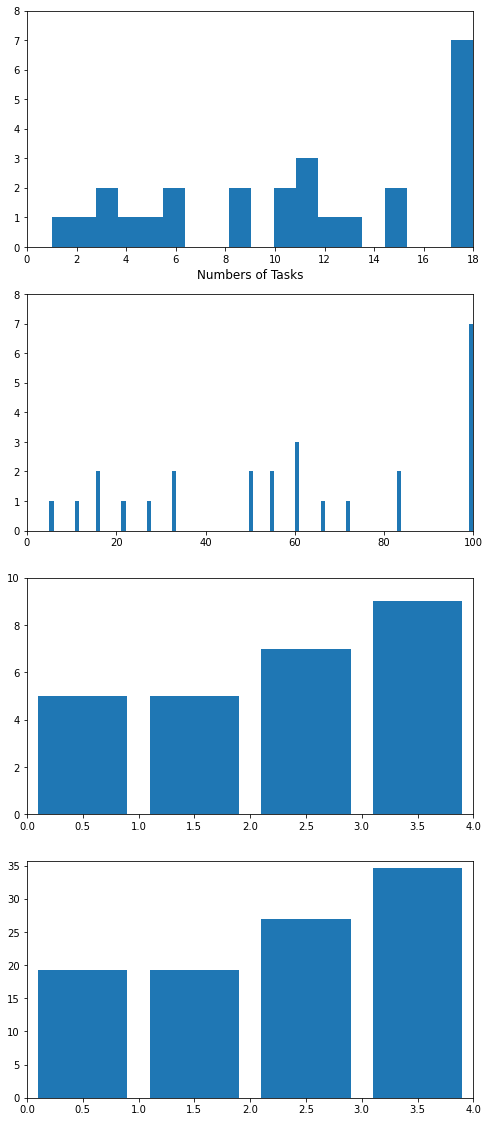

'\nTODO:\n- kumulativ: wie viele SuS haben mindestens X aufgaben gelöst?\n'

In [43]:
nr_tasks_per_pupil = []

# Könnte für jeden SoS schauen, ob sie alle aufgaben gemacht haben.
for pupil in final_pupils_KI:
    nr_tasks_per_pupil.append(len(pupil["solvedTaskSeries"]))

print("NR tasks per pupil: " + str(nr_tasks_per_pupil))
nr_all_tasks = 18

completion_rates = [int((nr_tasks/nr_all_tasks)*100) for nr_tasks in nr_tasks_per_pupil]
print("Completion rates: " + str(completion_rates))
print("\n")




# SUS per QUARTILE
quartiles = [0 for quartile in range(1, 5)]

for rate in completion_rates:
    if (rate<=25):
        quartiles[0] += 1
    elif(rate > 25 and rate <=50):
        quartiles[1] += 1
    elif(rate > 50 and rate <=75):
        quartiles[2] += 1
    elif(rate > 75 and rate <=100):
        quartiles[3] += 1

print("Number SuS in each quartile: " + str(quartiles)) 

# in percent
percentage_sus_per_quart = [round((number/np.sum(quartiles))*100, 2) for number in quartiles]
print("Percent of students that have completed these quarts: " + str(percentage_sus_per_quart))





# PLOTS
fig, (ax1,ax2, ax3, ax4) = plt.subplots(nrows=4,ncols=1,figsize=(8,20))

ax1 = plt.subplot(411)
ax1.hist(nr_tasks_per_pupil, bins=np.max(nr_tasks_per_pupil)+1)
#ax1.set_title('Numbers of Tasks')
ax1.set_xlabel( "Numbers of Tasks" , size = 12 )
ax1.set_xlim([0, max(nr_tasks_per_pupil)])
ax1.set_ylim([0, nr_tasks_per_pupil.count(mode(nr_tasks_per_pupil))+1])

ax2 = plt.subplot(412)
ax2.hist(completion_rates, bins=np.max(completion_rates))
ax2.set_xlim([0, max(completion_rates)])
ax2.set_ylim([0, completion_rates.count(mode(completion_rates))+1])


ax3 = plt.subplot(413)
ax3.bar([elem + 0.5 for elem in range(len(quartiles))], quartiles)
ax3.set_xlim([0, len(quartiles)])
ax3.set_ylim([0, max(quartiles)+1])

ax4 = plt.subplot(414)
ax4.bar([elem + 0.5 for elem in range(len(percentage_sus_per_quart))], percentage_sus_per_quart)
ax4.set_xlim([0, len(percentage_sus_per_quart)])
ax4.set_ylim([0, max(percentage_sus_per_quart)+1])

plt.show()


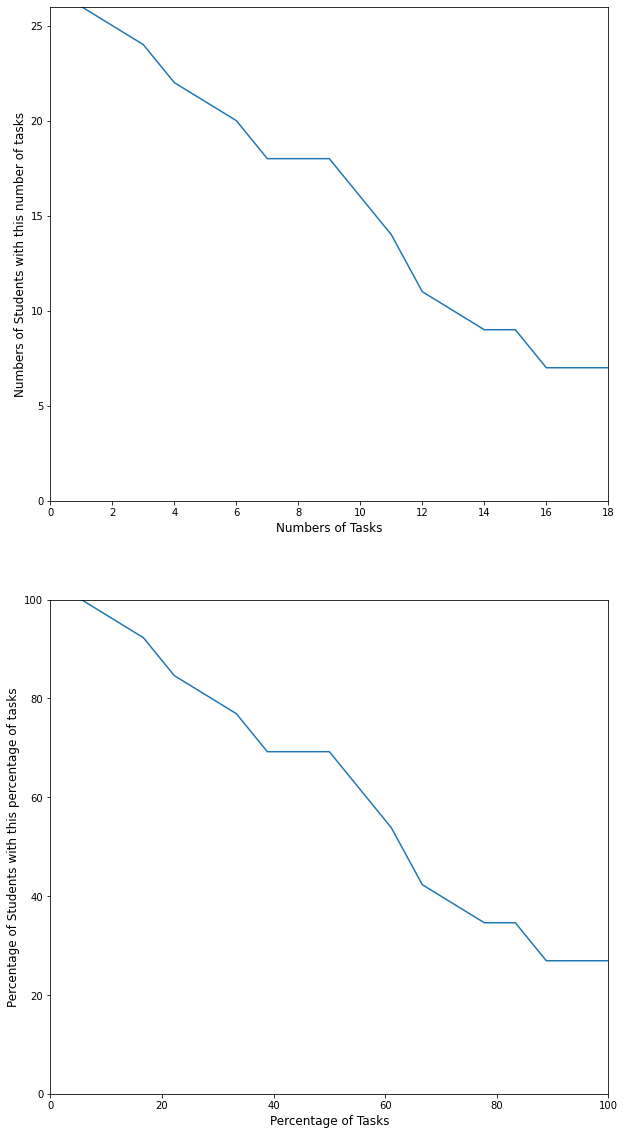

In [73]:
sorted_nr_tasks_per_pupil = np.sort(nr_tasks_per_pupil)

# Number of students with number of tasks
number_pupils_with_this_number_of_tasks = []
for i in range(18):
    at_least_this_number = 0
    for number in sorted_nr_tasks_per_pupil:
        if number >= i+1:
            at_least_this_number += 1
    number_pupils_with_this_number_of_tasks.append(at_least_this_number) #anzahl zahlen mit mehr

# percentage of students with each percentage of tasks
task_percentage = [i * (100/18) for i in range(1,19)]
pupil_percentages = [i * (100/len(final_pupils_KI)) for i in number_pupils_with_this_number_of_tasks]


# PLOTTING
fig, (ax1, ax2) = plt.subplots(nrows=2,ncols=1,figsize=(10,20))

ax1 = plt.subplot(211)
ax1.plot(range(1,19), number_pupils_with_this_number_of_tasks)
ax1.set_xlabel( "Numbers of Tasks" , size = 12 )
ax1.set_ylabel( "Numbers of Students with this number of tasks" , size = 12 )
ax1.set_xlim([0, 18])
ax1.set_ylim([0, len(sorted_nr_tasks_per_pupil)])

ax2 = plt.subplot(212)
ax2.plot(task_percentage, pupil_percentages)
ax2.set_xlabel( "Percentage of Tasks" , size = 12 )
ax2.set_ylabel( "Percentage of Students with this percentage of tasks" , size = 12 )
ax2.set_xlim([0, 100])
ax2.set_ylim([0, 100])

plt.show()

# fläche unter kurve könnte verglichen werden für verschiedene pakete? --> als proxy für abdeckung

### Durations KI Paket



total_duration                399.00
total_duration_minutes          6.65
number_tasks                    4.00
avg_duration_per_task_secs     22.24
dtype: float64


total_duration                8445.00
total_duration_minutes         140.75
number_tasks                    80.00
avg_duration_per_task_secs     288.11
dtype: float64


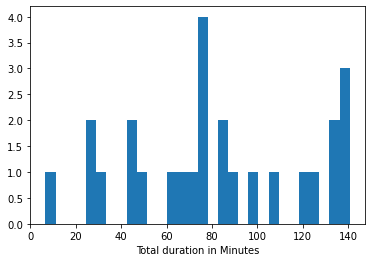

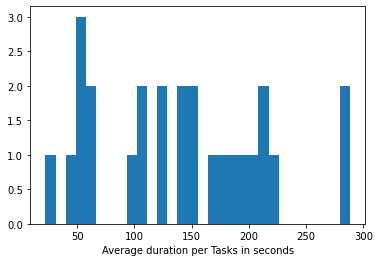

,total_duration,total_duration_minutes,number_tasks,avg_duration_per_task_secs
count,26.000000,26.000000,26.000000,26.000000
mean,4921.769231,82.029487,45.730769,140.498462
std,2355.092683,39.251545,26.785903,73.217406
min,399.000000,6.650000,4.000000,22.240000
25%,3077.500000,51.291667,24.000000,69.660000
50%,4607.500000,76.791667,44.000000,141.640000
75%,7058.750000,117.645833,76.250000,191.180000
max,8445.000000,140.750000,80.000000,288.110000


In [229]:
per_student = {str(pupil["_id"]): {"total_duration": 0, "total_duration_minutes": 0,"number_tasks": 0, "avg_duration_per_task_secs": 0} for pupil in final_pupils_KI}

for pupil in final_pupils_KI: #für jeden schüler
    #print(pupil)
    for task in pupil["solvedTaskSeries"]:
        #print(task)
        for subsections in task["currentSections"]:
            #print(subsections)
            for subsection in subsections["currentSubSections"]:
                #total_duration += subsection["duration"]
                #total_task_count += 1
                per_student[pupil["_id"]]["total_duration"] += subsection["duration"]
                per_student[pupil["_id"]]["number_tasks"] += 1
                pass
    per_student[pupil["_id"]]["avg_duration_per_task_secs"] = round(per_student[pupil["_id"]]["total_duration"]/per_student[pupil["_id"]]["number_tasks"], 2)
    per_student[pupil["_id"]]["total_duration_minutes"] = per_student[pupil["_id"]]["total_duration"]/60

#print("Average Duration KI Paket: " + str(total_duration / len(final_pupils_KI)))
#print(per_student)

per_student_df = pd.DataFrame.from_dict(per_student).T

print("\n")
print(per_student_df.min())
print("\n")
print(per_student_df.max())

#plt.hist(per_student_df["total_duration_minutes"], bins=int(per_student_df["total_duration_minutes"].max()))
plt.hist(per_student_df["total_duration_minutes"], bins=30)
plt.xlabel("Total duration in Minutes")
plt.show()
#plt.hist(per_student_df["avg_duration_per_task_secs"], bins=int(per_student_df["avg_duration_per_task_secs"].max())+1)
plt.hist(per_student_df["avg_duration_per_task_secs"], bins=30)
plt.xlabel("Average duration per Tasks in seconds")
plt.show()

per_student_df.describe()

# Eine Spezifische Aufgabe auswählend

In [1]:
tasktypes = ["blockly", "multipleChoice", "freetext", "survey", "inputField", "surveySlider", "noTask"]
exercise_keys = ['state', 'submitted', 'history', 'subType', 'evaluation', 'falseAttempts', 'hintsTaken', 'rating', 'teacherFeedback']


columns = ["_id", "taskSeriesId", "subsec_nr"] + exercise_keys
df = pd.DataFrame(columns=columns)

row_nr = 0
for pupil in final_pupils_KI:
    for task in pupil["solvedTaskSeries"]:
        if(task["taskSeriesId"] == "EvalML"):
            for section in task["currentSections"]:
                subsec_nr = 1
                for subsection in section["currentSubSections"]:
                    new_df = df.append({"_id": pupil["_id"], 'taskSeriesId': 'EvalML', "subsec_nr": subsec_nr}, ignore_index=True)
                    df = new_df.copy()
                    if("exercise" in subsection.keys()):
                        for key in subsection["exercise"].keys():
                            df.at[row_nr, key] = subsection["exercise"][key]
                            pass
                    subsec_nr += 1
                    row_nr += 1
# here we fill the df with all subsections in the EvalML taskseries

#questions = ["Wie gut hast du verstanden, was KI ist?", "Wie gut hast du den Unterschied zwischen spezifischer und allgemeiner KI verstanden?", "MC: Welche Aussagen stimmen?", "MC", "Wie gut hast du verstanden, was maschinelles Lernen ist?", "Wie sehr hast du das Gefühl, verstanden zu haben, was der Unterschied zwischen überwachtem und unüberwachtem Lernen ist?", "Beschreib noch einmal in eigenen Worten, was maschinelles Lernen ist.", "MC: Welche der Aussagen über maschinelles Lernen stimmen?", "MC: Welche Art des Lernens sind folgende Aufgaben?", "noTask"]

questions = {"1": "Wie gut hast du verstanden, was KI ist?", "2": "Wie gut hast du den Unterschied zwischen spezifischer und allgemeiner KI verstanden?", "3": "MC: Welche Aussagen stimmen?", "4": "MC", "5": "Wie gut hast du verstanden, was maschinelles Lernen ist?", "6": "Wie sehr hast du das Gefühl, verstanden zu haben, was der Unterschied zwischen überwachtem und unüberwachtem Lernen ist?", "7": "Beschreib noch einmal in eigenen Worten, was maschinelles Lernen ist.", "8": "MC: Welche der Aussagen über maschinelles Lernen stimmen?", "9": "MC: Welche Art des Lernens sind folgende Aufgaben?", "10": "noTask"}


#now we separate it by the number of the subsection into different dataframes
"""
for value in set(df["subsec_nr"].values):
    namestring = "df"+str(value)
    exec('{} = pd.DataFrame(df.loc[df[\'subsec_nr\'] == value])'.format(namestring))
"""

df["question"] = questions[str(row["subsec_nr"])]

for i, row in df.iterrows():
    #print(row["subsec_nr"])
    row["question"] = questions[str(row["subsec_nr"])]
    #pass

#df["question"] = questions[df["subsec_nr"]]

df.head()

NameError: name 'pd' is not defined

Wie gut hast du verstanden, was KI ist? --> Mean: 73.2
Wie gut hast du verstanden, was KI ist? --> Median: 77.5

Wie gut hast du den Unterschied zwischen spezifischer und allgemeiner KI verstanden? --> Mean: 82.5
Wie gut hast du den Unterschied zwischen spezifischer und allgemeiner KI verstanden? --> Median: 94.0

Wie gut hast du verstanden, was maschinelles Lernen ist? --> Mean: 74.3
Wie gut hast du verstanden, was maschinelles Lernen ist? --> Median: 75.0

Wie sehr hast du das Gefühl, verstanden zu haben, was der Unterschied zwischen überwachtem und unüberwachtem Lernen ist? --> Mean: 81.1
Wie sehr hast du das Gefühl, verstanden zu haben, was der Unterschied zwischen überwachtem und unüberwachtem Lernen ist? --> Median: 87.0


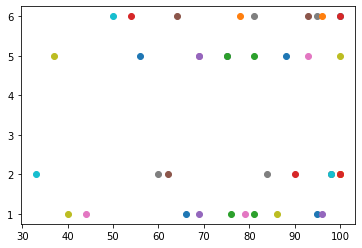

In [251]:
for i, row in df.iterrows():
    if(row["subType"] == "surveySlider"):
        plt.scatter(row["state"], row["subsec_nr"])
        #pass

print(questions[0] + " --> Mean: " + str(df.loc[df["subsec_nr"] == 1]["state"].mean()))  
print(questions[0] + " --> Median: " + str(df.loc[df["subsec_nr"] == 1]["state"].median())) 
print("")
print(questions[1] + " --> Mean: " + str(df.loc[df["subsec_nr"] == 2]["state"].mean())) 
print(questions[1] + " --> Median: " + str(df.loc[df["subsec_nr"] == 2]["state"].median()))
print("")
print(questions[4] + " --> Mean: " + str(df.loc[df["subsec_nr"] == 5]["state"].mean()))  
print(questions[4] + " --> Median: " + str(df.loc[df["subsec_nr"] == 5]["state"].median()))
print("")
print(questions[5] + " --> Mean: " + str(df.loc[df["subsec_nr"] == 6]["state"].mean())) 
print(questions[5] + " --> Median: " + str(df.loc[df["subsec_nr"] == 6]["state"].median())) 

<class 'int'>


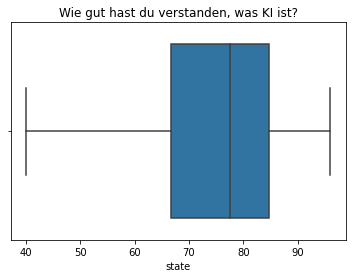

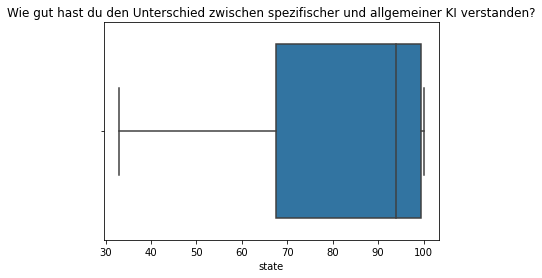

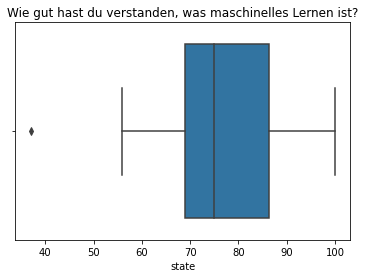

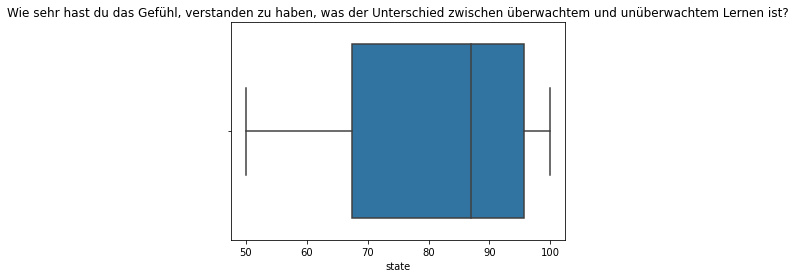

In [41]:
import seaborn as sns

for i in [1, 2, 5, 6]:
    #print(df[df["subsec_nr"] == i])
    #ax = sns.boxplot(x=df[df["subsec_nr"] == i])
    ax = sns.boxplot(x=df.loc[df["subsec_nr"] == i]["state"])
    ax.set_title(questions[str(i)])
    plt.show()

# Boxplot:
# Median, Box sind 50% zwischen oeberen und unterem Quartil. Interquartilsabstand.
# Whiskers: Länge der Whisker auf maximal das 1,5-Fache des Interquartilsabstands (1,5×IQR) zu beschränken. Dabei endet der Whisker jedoch nicht genau nach dieser Länge, sondern bei dem Wert aus den Daten, der noch innerhalb dieser Grenze liegt.
# Gibt es keine Werte außerhalb der Grenze von 1,5×IQR, wird die Länge des Whiskers durch den maximalen und minimalen Wert festgelegt.
# --> nur einen ausreißer beim "Was ist maschinelles Lernen"

In [252]:
# MCs ergebnisse checken
# freetext antworten checken (antworten, lehrer bewertung,...)
# durations

# welche subsections noch begutachten? --> welche in eval? welche sonst so?

In [24]:
# PANDAS RECAP!

#creating a DF
df1 = pd.DataFrame(randn(5,4),index='A B C D E'.split(),columns='W X Y Z'.split())

#selecting columns: 
df1[['W','Z']] # Pass a list of column names

#creating new columns:
df1['new'] = df1['W'] + df1['Y']

#selecting rows:
df1.loc['A'] #based on label
df1.iloc[2] #based on position

#subsets of rows and columns:
df1.loc['B','Y']
df1.loc[['A','B'],['W','Y']]


#conditional selection
df>0 #returns df with truth values
df[df>0] # return the dataframe and NaN where it is false
df1[df1['W']>0]
df1[df1['W']>0][['Y','X']] # sample some rows from this dataframe
df1[(df1['W']>0) & (df1['Y'] > 1)] #two conditions

,W,X,Y,Z,new
B,1.195530,0.468383,0.372688,0.198315,1.568218
C,0.130783,0.266145,2.825187,-0.197145,2.955970
E,1.301416,0.665148,0.611033,0.068698,1.912450


In [79]:
# MULTI-INDEXING
#ginge zb nach Schüler, nach Aufgabe und dann nach Subsection

pupilid = list(df["_id"])
taskseriesid = list(df["taskSeriesId"])
subsec_nr = list(df["subsec_nr"])

hier_index = list(zip(pupilid,taskseriesid, subsec_nr))
hier_index = pd.MultiIndex.from_tuples(hier_index)

df3 = pd.DataFrame(np.random.randn(100,2), index=hier_index, columns=['A','B'])
df3.index.names = ["pupilid", "taskseriesid", "subsec_nr"]

df3
df3.loc["bniRycMi5bwrXjvGy"].loc["EvalML"] #so kann man dann entries accessen! 
#.xs geht auch. weiß nicht, was der unterschied ist

,A,B
subsec_nr,,
1,-0.542106,-1.042975
2,1.187082,1.268756
3,1.809794,0.967925
4,-0.655562,-0.023410
5,1.198240,1.130571
6,0.112714,-0.847505
7,2.529616,0.796917
8,-0.395754,0.798019
9,1.275917,0.720822


In [81]:
# MISSING VALUES

df3.dropna() # drops all rows with missing values
df3.dropna(axis=1) # all columns with missing values
df3.dropna(thresh=2) #with a certain number of missing values
df3['A'].fillna(value=df3['A'].mean())

pupilid            taskseriesid  subsec_nr
bniRycMi5bwrXjvGy  EvalML        1           -0.542106
                                 2            1.187082
                                 3            1.809794
                                 4           -0.655562
                                 5            1.198240
                                                ...   
gooproPtWeTH6dtcB  EvalML        6            0.955551
                                 7            1.201803
                                 8            0.844916
                                 9            1.032072
                                 10           1.724321
Name: A, Length: 100, dtype: float64

In [227]:
# GROUPBY allows you to group rows of data together and call aggregate functions
slider_by_subsec_nr = df[df["subType"] == "surveySlider"].groupby("subsec_nr") #This will create a DataFrameGroupBy object
slider_by_subsec_nr.min() # we can then call aggregate methods off the object: .mean(), .std(), .min(), .max(), .count(), .describe()
slider_by_subsec_nr.max()

slider_by_subsec_nr["state"].sum()/10 # mean geht nicht --> sum durch anzahl je gruppe

subsec_nr
1    73.2
2    82.5
5    74.3
6    81.1
Name: state, dtype: float64

In [244]:
# man kann auch mittels pivot_table aggregieren
pd.pivot_table(df[df["subType"] == "surveySlider"], values='state', index=['taskSeriesId', 'subsec_nr'], aggfunc=np.sum)
pd.pivot_table(df[df["subType"] == "surveySlider"], index=['taskSeriesId', 'subsec_nr'], aggfunc={'state': [min, max, np.sum]})
# also possible with different agg functions for different columns: aggfunc={'state': np.sum,'state': [min, max, np.sum]}

state         
                         max min  sum
taskSeriesId subsec_nr               
EvalML       1            96  40  732
             2           100  33  825
             5           100  37  743
             6           100  50  811

In [ ]:
# MERGING, JOINING, CONCATENATING

# concatenation: pd.concat([df1,df2,df3])
# merging: pd.merge(left,right,how='inner',on='key')
# Joining is a convenient method for combining the columns of two potentially differently-indexed DataFrames into a single result DataFrame
# left.join(right)

In [233]:
# USEFUL OPERATIONS
# SORT Values
df.sort_values(by='subsec_nr')

# COUNTING
df[df["subType"] == "surveySlider"]["state"].unique() #unique values
df[df["subType"] == "surveySlider"]["state"].nunique() #number of unique values
df[df["subType"] == "surveySlider"]["state"].value_counts() #counts occurance of each value

df[(df['subType'] == "multipleChoice") & (df['evaluation']=="false")] #or correct
df[(df['subType'] == "multipleChoice") & (df['evaluation']=="false")][["taskSeriesId", "subsec_nr"]].value_counts()
# so kann man die Aufgaben mit den meisten Fehlern counten!

taskSeriesId  subsec_nr
EvalML        3            8
              8            6
              9            1
              4            1
dtype: int64

In [1]:
# PLOTTING
# pandas inbuild

'''
* df.plot.area
* df.plot.barh
* df.plot.density
* df.plot.hist
* df.plot.line
* df.plot.scatter
* df.plot.bar
* df.plot.box
* df.plot.hexbin
* df.plot.kde
* df.plot.pie
'''

'\n* df.plot.area\n* df.plot.barh\n* df.plot.density\n* df.plot.hist\n* df.plot.line\n* df.plot.scatter\n* df.plot.bar\n* df.plot.box\n* df.plot.hexbin\n* df.plot.kde\n* df.plot.pie\n'

# Groupby

grouping + then aggregating!

grouped_by_pupil = df.groupby("pupilId")

### Iterating
for name, group in grouped_by_pupil:
    print (name, group)
    
### Selecting a group
grouped_by_pupil.get_group(2014)

### Aggregations:
grouped['Points'].agg(np.mean)
grouped['Points'].agg([np.sum, np.mean, np.std]) # using multiple aggregation functions at once

### Transformations
score = lambda x: (x - x.mean()) / x.std()*10
print grouped.transform(score)

### Filtration
df.groupby('Team').filter(lambda x: len(x) >= 3)